# 0. Load packages and imports

In [3]:
## basic functionality
import pandas as pd
import numpy as np
import re

## can add others if you need them
import os
## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [6]:
sentencing_data = pd.read_csv("../../../data/sentencing_asof0405.csv")

/Users/rebeccajohnson/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10,11,14,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 0.2: Print head, dimensions, info (0 points)

In [7]:
sentencing_data.head()
sentencing_data.shape
sentencing_data.describe()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


(248146, 41)

,CASE_ID,CASE_PARTICIPANT_ID,CHARGE_ID,CHARGE_VERSION_ID,CHARGE_COUNT,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT
count,2.481460e+05,2.481460e+05,2.481460e+05,2.481460e+05,248146.000000,229126.000000,238359.000000
mean,3.994418e+11,7.592764e+11,3.727833e+11,6.993841e+11,2.146934,313.905236,32.304260
std,4.021778e+10,1.278659e+11,5.683272e+10,1.045102e+11,4.471453,2836.906096,11.788915
min,1.497653e+11,9.675748e+10,5.051006e+10,9.387179e+10,1.000000,-328549.000000,17.000000
25%,3.911642e+11,7.350705e+11,3.554747e+11,6.639332e+11,1.000000,73.000000,23.000000
50%,4.052353e+11,7.770306e+11,3.786575e+11,7.080422e+11,1.000000,183.000000,29.000000
75%,4.200996e+11,8.238105e+11,4.044695e+11,7.585453e+11,2.000000,381.000000,40.000000
max,4.455932e+11,9.055352e+11,4.484368e+11,8.385970e+11,297.000000,329379.000000,137.000000


# Part one: data cleaning/interpretation (group)

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [8]:
# Number of unique values for Cases, People, and Charges
sentencing_data[["CASE_ID","CASE_PARTICIPANT_ID","CHARGE_ID"]].nunique()

## Answers to sub questions
print("ANSWERS TO SUB QUESTIONS")
print("1). There are more unique people than unique cases because there are some cases that involved mutliple people. Example:")
grouped = sentencing_data.groupby("CASE_ID").filter(lambda x: x["CASE_PARTICIPANT_ID"].nunique() > 1)
keys = grouped["CASE_ID"].unique()  # rj note: something about this has a long runtime; no deduction but see solutions
random_key = keys[0] 
sentencing_data[sentencing_data.CASE_ID == random_key]

print("2). Some people receive multiple charges. Example:")
grouped_2 = sentencing_data.groupby("CASE_PARTICIPANT_ID").filter(lambda x: x["CHARGE_ID"].nunique() > 1)
keys_2 = grouped_2["CASE_PARTICIPANT_ID"].unique()
random_key_2 = keys_2[0]
sentencing_data[sentencing_data.CASE_PARTICIPANT_ID == random_key_2]

# Mean and median number of charges per case/participant
sentencing_data.groupby(["CASE_ID","CASE_PARTICIPANT_ID"])["CHARGE_COUNT"].sum().mean()
sentencing_data.groupby(["CASE_ID","CASE_PARTICIPANT_ID"])["CHARGE_COUNT"].sum().median()

# Mean and median number of participants per case
sentencing_data.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique().mean()
sentencing_data.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique().median()

# checking if we can follow participants across cases
print("Max number of cases per person: " + str(sentencing_data.groupby("CASE_PARTICIPANT_ID")["CASE_ID"].nunique().max()))
print("Above, we can note that the maximum number of cases per person is 1. Therefore, it does not seem that we are able to follow the same defendant across cases they're charged in.")

CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64

ANSWERS TO SUB QUESTIONS
1). There are more unique people than unique cases because there are some cases that involved mutliple people. Example:


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
92,166402790922,144234439761,11/17/2002 12:00:00 AM,PROMIS Conversion,False,61740816103,221831240837,MURDER/INTENT TO KILL/INJURE,11,9/8/2011 12:00:00 AM,...,NaN,8/28/2002 12:00:00 AM,8/28/2002 12:00:00 AM,C P D AREA 1,NaN,11/16/2002 12:00:00 PM,11/17/2002 12:00:00 AM,Charge(S) Approved,NaN,Homicide
93,166402790922,144234439761,11/17/2002 12:00:00 AM,PROMIS Conversion,False,61741117758,144970592466,AGG KID/ARMED,30,9/8/2011 12:00:00 AM,...,NaN,8/28/2002 12:00:00 AM,8/28/2002 12:00:00 AM,C P D AREA 1,NaN,11/16/2002 12:00:00 PM,11/17/2002 12:00:00 AM,Charge(S) Approved,NaN,Homicide
94,166402790922,144234439761,11/17/2002 12:00:00 AM,PROMIS Conversion,False,61801599518,272304409987,MURDER/STRONG PROB KILL/INJURE,4,9/8/2011 12:00:00 AM,...,NaN,8/28/2002 12:00:00 AM,8/28/2002 12:00:00 AM,C P D AREA 1,NaN,11/16/2002 12:00:00 PM,11/17/2002 12:00:00 AM,Charge(S) Approved,NaN,Homicide
95,166402790922,144234439761,11/17/2002 12:00:00 AM,PROMIS Conversion,False,61801750345,272303942885,MURDER/STRONG PROB KILL/INJURE,14,9/8/2011 12:00:00 AM,...,NaN,8/28/2002 12:00:00 AM,8/28/2002 12:00:00 AM,C P D AREA 1,NaN,11/16/2002 12:00:00 PM,11/17/2002 12:00:00 AM,Charge(S) Approved,NaN,Homicide
96,166402790922,144234439761,11/17/2002 12:00:00 AM,PROMIS Conversion,False,61884655101,170191996200,AGG VEHICULAR HIJACKING/DANGEROUS WEAPON,21,9/8/2011 12:00:00 AM,...,NaN,8/28/2002 12:00:00 AM,8/28/2002 12:00:00 AM,C P D AREA 1,NaN,11/16/2002 12:00:00 PM,11/17/2002 12:00:00 AM,Charge(S) Approved,NaN,Homicide
97,166402790922,144234439761,11/17/2002 12:00:00 AM,PROMIS Conversion,False,61955091465,346327502132,MURDER/OTHER FORCIBLE FELONY,7,9/8/2011 12:00:00 AM,...,NaN,8/28/2002 12:00:00 AM,8/28/2002 12:00:00 AM,C P D AREA 1,NaN,11/16/2002 12:00:00 PM,11/17/2002 12:00:00 AM,Charge(S) Approved,NaN,Homicide
98,166402790922,144234439761,11/17/2002 12:00:00 AM,PROMIS Conversion,False,61955292568,346327035030,MURDER/OTHER FORCIBLE FELONY,17,9/8/2011 12:00:00 AM,...,NaN,8/28/2002 12:00:00 AM,8/28/2002 12:00:00 AM,C P D AREA 1,NaN,11/16/2002 12:00:00 PM,11/17/2002 12:00:00 AM,Charge(S) Approved,NaN,Homicide
99,166402790922,144234439761,11/17/2002 12:00:00 AM,PROMIS Conversion,False,61955393120,346327221871,MURDER/OTHER FORCIBLE FELONY,19,9/8/2011 12:00:00 AM,...,NaN,8/28/2002 12:00:00 AM,8/28/2002 12:00:00 AM,C P D AREA 1,NaN,11/16/2002 12:00:00 PM,11/17/2002 12:00:00 AM,Charge(S) Approved,NaN,Homicide
100,166402790922,144234439761,11/17/2002 12:00:00 AM,PROMIS Conversion,False,61955644498,330713188987,AGG KID/INFLICT HARM,29,9/8/2011 12:00:00 AM,...,NaN,8/28/2002 12:00:00 AM,8/28/2002 12:00:00 AM,C P D AREA 1,NaN,11/16/2002 12:00:00 PM,11/17/2002 12:00:00 AM,Charge(S) Approved,NaN,Homicide
101,166402790922,144234439761,11/17/2002 12:00:00 AM,PROMIS Conversion,True,61740665276,221838714482,MURDER/INTENT TO KILL/INJURE,1,9/8/2011 12:00:00 AM,...,NaN,8/28/2002 12:00:00 AM,8/28/2002 12:00:00 AM,C P D AREA 1,NaN,11/16/2002 12:00:00 PM,11/17/2002 12:00:00 AM,Charge(S) Approved,NaN,Homicide


2). Some people receive multiple charges. Example:


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
5,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
6,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516698596,112267602827,ARMED ROBBERY,15,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
7,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516698596,112267602827,ARMED ROBBERY,15,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
8,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516748872,112265921257,ARMED ROBBERY,16,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


2.5132585138953756

1.0

1.0731980214561636

1.0

Max number of cases per person: 1
Above, we can note that the maximum number of cases per person is 1. Therefore, it does not seem that we are able to follow the same defendant across cases they're charged in.


## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


In [16]:
print("Answer to question 1:")
print("OFFENSE_CATEGORY is the offense the defendant is charged with before specific charges are filed in the case. These may differ from UPDATED_OFFENSE_CATEGORY because the latter represents the updated charge as the case evolves.")

## constructing variable for is_changed_offense
sentencing_data["is_changed_offense"] = (sentencing_data["OFFENSE_CATEGORY"] != sentencing_data["UPDATED_OFFENSE_CATEGORY"])

## printing the original offense categories (sorted) to see some more common charges
sentencing_data[["OFFENSE_CATEGORY","UPDATED_OFFENSE_CATEGORY","is_changed_offense"]].sort_values("OFFENSE_CATEGORY").head(200)

## show one example of a changed offense
sentencing_data[sentencing_data.is_changed_offense == True].head(1)
print("In the above example, we see the defendant was originally charged with PROMIS Conversion and then this was updated to homicide. What this means is that initially their crime was grouped under the PROMIS Conversion category, but as the case evolved, it was determined to be a homicide.")

Answer to question 1:
OFFENSE_CATEGORY is the offense the defendant is charged with before specific charges are filed in the case. These may differ from UPDATED_OFFENSE_CATEGORY because the latter represents the updated charge as the case evolves.


,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY,is_changed_offense
114779,Aggravated Assault Police Officer,Aggravated Fleeing and Eluding,True
227329,Aggravated Assault Police Officer,Aggravated Assault Police Officer,False
130976,Aggravated Assault Police Officer,Aggravated Assault Police Officer,False
130977,Aggravated Assault Police Officer,Aggravated Assault Police Officer,False
192496,Aggravated Assault Police Officer,Aggravated Assault Police Officer,False
...,...,...,...
246411,Aggravated Assault Police Officer,Aggravated Battery Police Officer,True
246352,Aggravated Assault Police Officer,Aggravated Assault Police Officer,False
123210,Aggravated Assault Police Officer,Aggravated Assault Police Officer,False
89095,Aggravated Assault Police Officer,Aggravated Battery Police Officer,True


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,is_changed_offense,simplified_offense_derived
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide,True,Homicide


In the above example, we see the defendant was originally charged with PROMIS Conversion and then this was updated to homicide. What this means is that initially their crime was grouped under the PROMIS Conversion category, but as the case evolved, it was determined to be a homicide.


## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [11]:
## for this first problem, we will utilize np.select to update our offense categories
## note: we are essentially just locating the appropriate strings within the offense categories and updating them accoridngly

conditions = [
    sentencing_data["UPDATED_OFFENSE_CATEGORY"].astype(str).str.contains("Aggravated|Arson|Homicide|vehicle|vehicular|battery",case=False) == False,
    sentencing_data["UPDATED_OFFENSE_CATEGORY"].astype(str).str.startswith("Aggravated"),
    sentencing_data["UPDATED_OFFENSE_CATEGORY"].astype(str).str.contains("Arson", case = False), 
    sentencing_data["UPDATED_OFFENSE_CATEGORY"].astype(str).str.contains("Homicide", case = False), 
    sentencing_data["UPDATED_OFFENSE_CATEGORY"].astype(str).str.contains('vehicle|vehicular', case = False), 
    sentencing_data["UPDATED_OFFENSE_CATEGORY"].astype(str).str.contains("Battery", case = False)
    ]

choices = [sentencing_data["UPDATED_OFFENSE_CATEGORY"],sentencing_data["UPDATED_OFFENSE_CATEGORY"].astype(str).str.replace('Aggravated ',""),"Arson","Homicide","Vehicle-related","Battery"]

## creating our new simplified_offense_derived column
sentencing_data["simplified_offense_derived"] = np.select(conditions, choices)

## computing the difference between the number of unique values in UPDATED_OFFENSE_CATEGORY and the number of unique values in simplified_offense_derived
difference = sentencing_data["UPDATED_OFFENSE_CATEGORY"].nunique() - sentencing_data["simplified_offense_derived"].nunique()

# print the difference
print("difference: " + str(difference))


difference: 12


In [22]:
## rj check 
### issue where those forms of battery w aggravated isn't getting properly simplified to 
### battery since the np.select is looking at the original
### updated_offense_category rather than newly recoded category (so instructions on "first" strip out aggravated, "then...")
sentencing_data.loc[sentencing_data.UPDATED_OFFENSE_CATEGORY.isin(['Aggravated Battery Police Officer', 
                        'Aggravated Battery With A Firearm']),
                   ['UPDATED_OFFENSE_CATEGORY', 'simplified_offense_derived']].sample(n = 10, 
                                                                                     random_state = 84)


,UPDATED_OFFENSE_CATEGORY,simplified_offense_derived
179441,Aggravated Battery With A Firearm,Battery With A Firearm
244855,Aggravated Battery Police Officer,Battery Police Officer
221256,Aggravated Battery Police Officer,Battery Police Officer
88490,Aggravated Battery With A Firearm,Battery With A Firearm
246060,Aggravated Battery Police Officer,Battery Police Officer
237009,Aggravated Battery Police Officer,Battery Police Officer
58858,Aggravated Battery With A Firearm,Battery With A Firearm
206835,Aggravated Battery With A Firearm,Battery With A Firearm
88494,Aggravated Battery With A Firearm,Battery With A Firearm
159366,Aggravated Battery Police Officer,Battery Police Officer


## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [23]:
## RACE INDICATORS
# Black
sentencing_data["is_black_derived"] = sentencing_data["RACE"].astype(str).str.contains("black",case=False)

# Hispanic
sentencing_data["is_hisp_derived"] = ((sentencing_data["RACE"].astype(str).str.contains("hispanic",case=False)) & (sentencing_data["RACE"].astype(str).str.contains("black",case = False) == False))

# White
sentencing_data["is_white_derived"] = ((sentencing_data["RACE"].astype(str).str.contains("white",case=False)) & (sentencing_data["RACE"].astype(str).str.contains("hispanic",case = False) == False))

# Other ethnicity
sentencing_data["is_othereth_derived"] = sentencing_data["RACE"].astype(str).str.contains("asian|american|unknown|biracial|NaN",case = False)

## GENDER
# note: here, we used full match because there is another identifier which contains "Male" but we only want this one
sentencing_data["is_male_derived"] = (sentencing_data["GENDER"].astype(str).str.fullmatch("Male")) 

## AGE AT INCIDENT
# Here, we used np.select to create our windsorized age variable. We filtered strictly above the 99.99th percentile.
conditions = [sentencing_data.AGE_AT_INCIDENT > sentencing_data["AGE_AT_INCIDENT"].quantile(0.9999), sentencing_data.AGE_AT_INCIDENT <= sentencing_data["AGE_AT_INCIDENT"].quantile(0.9999)]
choices = [sentencing_data["AGE_AT_INCIDENT"].quantile(.9999), sentencing_data["AGE_AT_INCIDENT"]]
sentencing_data["age_derived"] = np.select(conditions, choices)

## Sentencing length
sentencing_data["sentenceymd_derived"] = pd.to_datetime(sentencing_data.SENTENCE_DATE, format = "%m/%d/%Y 12:00:00 AM", errors = "coerce")
sentencing_data["sentenceym_derived"] = pd.to_datetime(sentencing_data.sentenceymd_derived - pd.offsets.MonthBegin(), errors = "coerce")

## Judge ID
judges_sorted = sentencing_data.SENTENCE_JUDGE.sort_values().unique() ## pull out all the names of judges we need to loop through

visited_judges = []                ## keep track of the judges we've visited to avoid duplicates
counter = 1                        ## maintain a counter to keep track of the judge id number that we're on

sutker_visited = False             ## boolean to note if we've added Judge Sutker yet... will use this to avoid adding Sutker twice
sutker_id = ""                     ## keep track of Sutker's id number for future use

simpson_visited = False            ## boolean to note if we've added Judge Simpson yet... will use this to avoid adding Simpson twice
simpson_id = ""                    ## keep track of Simpson's id number for future use


# General loop idea: (1) loop over all judges (2) check if that judge has an id yet (3) if they don't have an id, assign them one; if they do have an id, assign them their id (4) handle Sutker and Simpson 

for judge in judges_sorted:
    
    # Make sure the judge has not already been visited
    if (visited_judges.count(judge) == 0):

        # Handle Simpson separately
        if ("Simpson" in str(judge)):
            if (simpson_visited): ## pass current id if visited
                sentencing_data.loc[sentencing_data.SENTENCE_JUDGE == judge, "judgeid_derived"] = simpson_id
            else: 
                simpson_visited = True                      ## if not yet visited, mark as visited
                visited_judges.append(judge)                ## add to visited list
                simpson_id = "judge_" + str(counter)        ## construct judge id
                sentencing_data.loc[sentencing_data.SENTENCE_JUDGE == judge, "judgeid_derived"] = simpson_id ## insert judge id
                counter = counter + 1                       ## update counter
        
        # Handle Sutker separately (same process as Simpson)
        elif ("Sutker" in str(judge)):
            if (sutker_visited):
                sentencing_data.loc[sentencing_data.SENTENCE_JUDGE == judge, "judgeid_derived"] = sutker_id
            else:
                sutker_visited = True
                visited_judges.append(judge)
                sutker_id = "judge_" + str(counter)
                sentencing_data.loc[sentencing_data.SENTENCE_JUDGE == judge, "judgeid_derived"] = sutker_id
                counter = counter + 1
        
        # Handle everyone else (same process as above)
        else:        
            visited_judges.append(judge)
            judge_name = "judge_" + str(counter)
            sentencing_data.loc[sentencing_data.SENTENCE_JUDGE == judge, "judgeid_derived"] = judge_name
            counter = counter + 1


# Ranodom sample of 10 rows to confirm our changes worked!
sentencing_data[["is_black_derived","is_hisp_derived","is_white_derived","is_othereth_derived","RACE","is_male_derived","GENDER","age_derived","AGE_AT_INCIDENT","sentenceymd_derived","sentenceym_derived","SENTENCE_DATE","judgeid_derived","SENTENCE_JUDGE"]].sample(10)


,is_black_derived,is_hisp_derived,is_white_derived,is_othereth_derived,RACE,is_male_derived,GENDER,age_derived,AGE_AT_INCIDENT,sentenceymd_derived,sentenceym_derived,SENTENCE_DATE,judgeid_derived,SENTENCE_JUDGE
225731,True,False,False,False,Black,True,Male,0.0,NaN,2020-03-16,2020-03-01,3/16/2020 12:00:00 AM,judge_166,"Kenworthy, Diana"
44049,False,True,False,False,White [Hispanic or Latino],True,Male,21.0,21.0,2011-12-12,2011-12-01,12/12/2011 12:00:00 AM,judge_72,ELLEN MANDELTORT
115759,True,False,False,False,Black,True,Male,22.0,22.0,2014-01-10,2014-01-01,1/10/2014 12:00:00 AM,judge_305,Thomas M Davy
106329,True,False,False,False,Black,True,Male,17.0,17.0,2016-05-09,2016-05-01,5/9/2016 12:00:00 AM,judge_82,Erica L Reddick
93828,False,False,False,True,NaN,True,Male,22.0,22.0,2013-06-05,2013-06-01,6/5/2013 12:00:00 AM,judge_246,Paula M Daleo
165179,False,False,True,False,White,True,Male,43.0,43.0,2016-02-16,2016-02-01,2/16/2016 12:00:00 AM,judge_190,Marc W Martin
158059,False,True,False,False,White [Hispanic or Latino],False,Female,21.0,21.0,2017-02-22,2017-02-01,2/22/2017 12:00:00 AM,judge_62,Diane Gordon Cannon
222511,False,False,True,False,White,True,Male,41.0,41.0,2018-08-23,2018-08-01,8/23/2018 12:00:00 AM,judge_225,Michael J Hood
16136,False,True,False,False,White [Hispanic or Latino],True,Male,42.0,42.0,2011-01-21,2011-01-01,1/21/2011 12:00:00 AM,judge_84,Evelyn B Clay
52921,True,False,False,False,Black,True,Male,19.0,19.0,2012-08-29,2012-08-01,8/29/2012 12:00:00 AM,judge_328,William G Lacy


## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [24]:
## Subset to cases where only one participant is charged
grouped = sentencing_data.groupby("CASE_ID").filter(lambda x: x["CASE_PARTICIPANT_ID"].nunique() == 1)

## Go from a participant-case level dataset to a participant-level dataset
participant_level = grouped[grouped.PRIMARY_CHARGE_FLAG & grouped.CURRENT_SENTENCE_FLAG]
test = participant_level.groupby("CASE_ID").filter(lambda x: x["CASE_PARTICIPANT_ID"].nunique() > 1)
print("Confirming there are no longer multiple charges for the same case-participant:")
test.shape

## Filtering out where judge is nan or nonsensical
judges_removed = participant_level[~pd.isnull(participant_level.SENTENCE_JUDGE) & ~(participant_level.SENTENCE_JUDGE == "FLOOD")]

## Subsetting between 01-01-2012 and 04-05-2021 (inclusive)
dates_subset = judges_removed[((judges_removed.sentenceymd_derived >= "2012-01-01") & (judges_removed.sentenceymd_derived <= "2021-04-05"))]
print("New number of rows: " + str(dates_subset.shape[0]))

## rj note: no deductions but for some reason the grouped and filter syntax
## has longer runtime than just grouping by case id and subsetting to indices 
## where value count == 1

Confirming there are no longer multiple charges for the same case-participant:


(0, 52)

New number of rows: 135151


# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [25]:
data = pd.read_pickle("../../../data/sentencing_cleaned.pkl")
import plotnine as p9
from plotnine import ggplot, geom_point, aes, theme, element_text

## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

9        2014-10-01
16       2014-08-01
19       2012-09-01
26       2014-09-01
28       2013-05-01
            ...    
248141   2021-03-01
248142   2021-03-01
248143   2021-03-01
248144   2021-03-01
248145   2021-03-01
Name: sentenceym_derived, Length: 108988, dtype: datetime64[ns]

    sentenceym_derived  Denominator   Race  Count      prop
0           2012-01-01         1376  False    242  0.175872
1           2012-01-01         1376   True   1134  0.824128
2           2012-02-01         1174  False    233  0.198467
3           2012-02-01         1174   True    941  0.801533
4           2012-03-01         1285  False    255  0.198444
..                 ...          ...    ...    ...       ...
217         2021-01-01          328   True    278  0.847561
218         2021-02-01          386  False     66  0.170984
219         2021-02-01          386   True    320  0.829016
220         2021-03-01          441  False     79  0.179138
221         2021-03-01          441   True    362  0.820862

[222 rows x 5 columns]


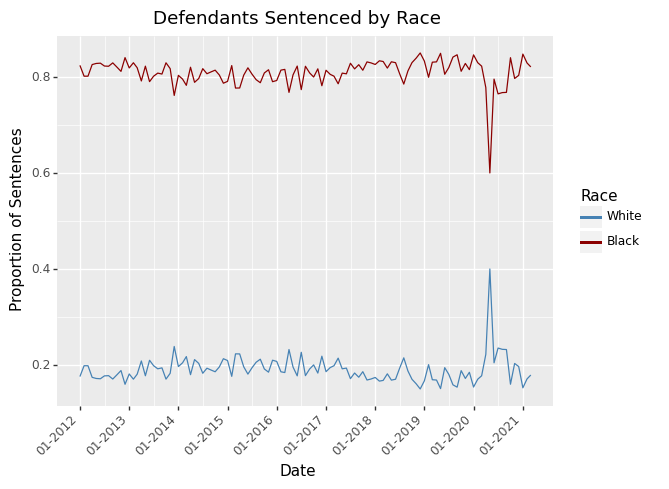

<ggplot: (8787162834815)>

In [26]:
# Make new data frame with the four columns needed and all rows 
df1 = data.loc[:, ('sentenceym_derived', 'CASE_ID', 'is_black_derived', 'is_white_derived')]

# Filter out for rows that are neither white nor black 
df1 = df1[(df1["is_white_derived"] == True) | (df1["is_black_derived"] == True)]

# Format to correct data type
pd.to_datetime(df1['sentenceym_derived'])

# Data frame for denominator
## rj note: no deduction but denom here is then just black/white
## defendants rather than "unique cases" in a month
denom = df1.groupby(by = 'sentenceym_derived')['CASE_ID'].count()
df1 = df1.reset_index()

# Count of numerator by month / year 
# (can use just is_black because filtered out for only white or black)
df2 = df1.groupby(by = ['sentenceym_derived', 'is_black_derived'])["CASE_ID"].count()
df2 = df2.reset_index()

df2 = pd.DataFrame(df2)
denom = pd.DataFrame(denom)

# Combine into one table and label columns
df4 = pd.merge(denom, df2, on = 'sentenceym_derived')
df5 = df4.set_axis(['sentenceym_derived', 'Denominator', 'Race', 'Count'], axis=1, inplace=False)

# Create new column for proportion by month 
df5['prop'] = df5['Count']/df5['Denominator']

#Print the table 
print(df5)

# Graph 
figure = (p9.ggplot(data=df5, mapping=p9.aes(x='sentenceym_derived', color = 'Race')) +
 p9.geom_line(p9.aes(y = "prop")) +
          theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + 
          p9.labs(x = "Date", 
               y = "Proportion of Sentences", 
               title = "Defendants Sentenced by Race")+
          p9.scale_color_manual(values = ['steelblue', 'darkred'], labels = ['White', 'Black']) 
)


figure + p9.scale_x_date(date_labels = "%m-%Y")

rj note- small deduction since need this interpretation

- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

9        2014-10-01
16       2014-08-01
19       2012-09-01
26       2014-09-01
28       2013-05-01
            ...    
248141   2021-03-01
248142   2021-03-01
248143   2021-03-01
248144   2021-03-01
248145   2021-03-01
Name: sentenceym_derived, Length: 108988, dtype: datetime64[ns]

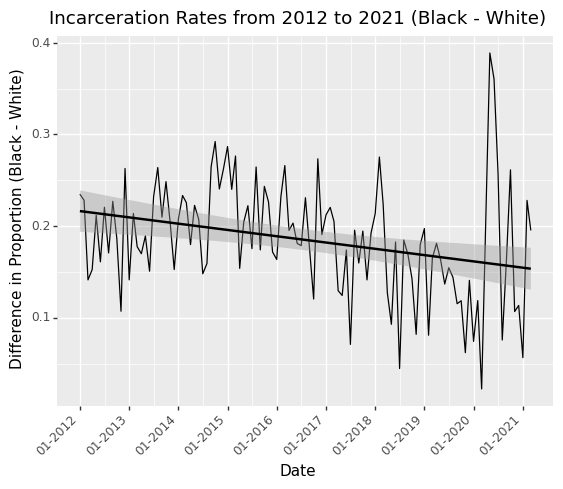

<ggplot: (8787170826367)>

In [27]:
#Pull relevant columns
df6 = data.loc[:, ('sentenceym_derived', 'CASE_ID', 'is_black_derived', 'is_white_derived', 'COMMITMENT_TYPE')]

#Filter out for only white and black defendants
df6 = df6[(df6["is_white_derived"] == True) | (df6["is_black_derived"] == True)]

#Format sentencing dates properly
pd.to_datetime(df6['sentenceym_derived'])

#Find total cases involving black people and count them
black_total = df6[(df6["is_black_derived"] == True)]
denom_black = black_total.groupby(by = 'sentenceym_derived')['CASE_ID'].count()

#Find incarcerations by sorting by commitment type
black_grouped = black_total[(black_total["COMMITMENT_TYPE"] == "Illinois Department of Corrections")]
black_grouped = black_grouped.groupby(by = "sentenceym_derived")["CASE_ID"].count()

#merge total cases and incarcerated frames together, then add a column to find proportions
black_finished = pd.merge(black_grouped, denom_black, on = 'sentenceym_derived')
black_finished.columns = ["black_incarcerated", "black_totals"]
black_finished["black_prop"] = black_finished["black_incarcerated"] / black_finished["black_totals"]

## Repeat Process to find the proportion of white incarcerations
white_total = df6[(df6["is_white_derived"] == True)]
denom_white = white_total.groupby(by = 'sentenceym_derived')['CASE_ID'].count()

white_grouped = white_total[(white_total["COMMITMENT_TYPE"] == "Illinois Department of Corrections")]
white_grouped = white_grouped.groupby(by = "sentenceym_derived")["CASE_ID"].count()

white_finished = pd.merge(white_grouped, denom_white, on = 'sentenceym_derived')
white_finished.columns = ["white_incarcerated", "white_totals"]
white_finished["white_prop"] = white_finished["white_incarcerated"] / white_finished["white_totals"]

# Merge white and black dfs
final_incarceration_df = pd.merge(black_finished, white_finished, on = 'sentenceym_derived')
final_incarceration_df["difference"] = (final_incarceration_df["black_prop"] - final_incarceration_df["white_prop"])
final_incarceration_df = final_incarceration_df.reset_index()

# Plot figure
figure3 = (p9.ggplot(data=final_incarceration_df, mapping=p9.aes(x='sentenceym_derived', y = 'difference')) +
           p9.geom_line() +
           theme(axis_text_x  = element_text(angle = 45, hjust = 1)) +
           p9.labs(x = "Date", 
                y = "Difference in Proportion (Black - White)", 
                title = "Incarceration Rates from 2012 to 2021 (Black - White)") +
           p9.geom_smooth(method = 'lm')
           
          )

figure3 + p9.scale_x_date(date_labels = "%m-%Y")

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [29]:
simplified_offenses = data.loc[:, ('sentenceym_derived', 'CASE_ID', 'is_black_derived', 'is_white_derived', 'simplified_offense_derived')]
simplified_offenses = simplified_offenses[(simplified_offenses["is_white_derived"] == True) | (simplified_offenses["is_black_derived"] == True)]

# begin building list of top ten crimes black defendents are most often charged with
black_simplified_offenses = simplified_offenses[simplified_offenses['is_black_derived'] == True]

# get charge counts
black_simplified_offenses = black_simplified_offenses.groupby(by = "simplified_offense_derived").count()
black_simplfied_offenses = black_simplified_offenses.sort_values(by = "CASE_ID", ascending = False)

# export top ten crimes to its own data frame
black_ten_df = black_simplfied_offenses[:10]
black_ten_df = black_ten_df.reset_index()
black_top_ten = black_ten_df.simplified_offense_derived.unique().tolist()

# Same process for white offenses
white_simplified_offenses = simplified_offenses[simplified_offenses['is_white_derived'] == True]

# get charge counts
white_simplified_offenses = white_simplified_offenses.groupby(by = "simplified_offense_derived").count()
white_simplfied_offenses = white_simplified_offenses.sort_values(by = "CASE_ID", ascending = False)

# export top ten crimes to its own data frame
white_ten_df = white_simplfied_offenses[:10]
white_ten_df = white_ten_df.reset_index()
white_top_ten = white_ten_df.simplified_offense_derived.unique().tolist()

# concatonate lists of both black and white most common crimes and then delete duplicated to get combined list
combined_top_ten = black_top_ten + white_top_ten
combined_top_ten = np.unique(combined_top_ten).tolist()
print(combined_top_ten)

## rj note: no deduction but see solutions for two-liner approach!

['Battery', 'Burglary', 'DUI', 'Driving With Suspended Or Revoked License', 'Narcotics', 'Other Offense', 'Residential Burglary', 'Retail Theft', 'Robbery', 'Theft', 'UUW - Unlawful Use of Weapon', 'Vehicle-related']


### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [30]:
wso = pd.DataFrame(white_simplified_offenses)
wso = wso.reset_index()

wso = wso[wso["simplified_offense_derived"].isin(combined_top_ten)]
wso = wso.loc[:, ('simplified_offense_derived', 'is_white_derived')]
#print(wso)

bso = pd.DataFrame(black_simplified_offenses)
bso = bso.reset_index()
bso = bso[bso["simplified_offense_derived"].isin(combined_top_ten)]
bso = bso.loc[:, ('simplified_offense_derived', 'is_black_derived')]
#print(bso)

base_232 = data.loc[:, ('sentenceym_derived', 'CASE_ID', 'is_black_derived', 'is_white_derived', 'COMMITMENT_TYPE', 'simplified_offense_derived')]

#Filter out for non-complete entries as in 2.1 and create a new base dataset for q2.3.2
base_232 = base_232[(base_232["is_white_derived"] == True) | (df6["is_black_derived"] == True)]
black_total_2 = base_232[(base_232["is_black_derived"] == True)]

#build out a new df that has totals of cases by offense type filtered for black defendants
denom_black_2 = black_total_2.groupby(by = 'simplified_offense_derived')['CASE_ID'].count()
denom_black_2 = denom_black_2.reset_index()
#denom_black_2.columns = ["simplified_offense_derived", "total_cases"]
denom_black_2 = denom_black_2[denom_black_2["simplified_offense_derived"].isin(combined_top_ten)]
#print(denom_black_2)

# Filter for relevant crimes we want to compare

#build out a new df for a numerator that has incarceration counts by offense type for black defendants
black_incarc_2 = black_total_2[(black_total_2["COMMITMENT_TYPE"] == "Illinois Department of Corrections")]
black_incarc_2 = black_incarc_2.groupby(by = "simplified_offense_derived")["CASE_ID"].count()

#Filter for relevant crimes we want to compare
black_incarc_2 = black_incarc_2.reset_index()
black_incarc_2 = black_incarc_2[black_incarc_2["simplified_offense_derived"].isin(combined_top_ten)]
#print(black_incarc_2)

# Merge data frames and rename columns for clarity
black_prop_df = pd.merge(denom_black_2, black_incarc_2, on = 'simplified_offense_derived')
black_prop_df.columns = ["simplified_offense_derived", "total_cases", "incarcerations"]

black_prop_df["prop_incarcerated"] = black_prop_df.incarcerations / black_prop_df.total_cases

#prepare for merging with equivalent white df
black_prop_df = black_prop_df.loc[:, ("simplified_offense_derived", 'prop_incarcerated')]
#print(black_prop_df)


### Repeat Process for White defendants

white_total_2 = base_232[(base_232["is_white_derived"] == True)]

#build out a new df that has totals of cases by offense type filtered for black defendants
denom_white_2 = white_total_2.groupby(by = 'simplified_offense_derived')['CASE_ID'].count()
denom_white_2 = denom_white_2.reset_index()

denom_white_2 = denom_white_2[denom_white_2["simplified_offense_derived"].isin(combined_top_ten)]
#print(denom_white_2)
# Filter for relevant crimes we want to compare

#build out a new df for a numerator that has incarceration counts by offense type for black defendants
white_incarc_2 = white_total_2[(white_total_2["COMMITMENT_TYPE"] == "Illinois Department of Corrections")]
white_incarc_2 = white_incarc_2.groupby(by = "simplified_offense_derived")["CASE_ID"].count()

#Filter for relevant crimes we want to compare
white_incarc_2 = white_incarc_2.reset_index()
white_incarc_2 = white_incarc_2[white_incarc_2["simplified_offense_derived"].isin(combined_top_ten)]
#print(black_incarc_2)

# Merge data frames and rename columns for clarity
white_prop_df = pd.merge(denom_white_2, white_incarc_2, on = 'simplified_offense_derived')
white_prop_df.columns = ["simplified_offense_derived", "total_cases", "incarcerations"]

white_prop_df["prop_incarcerated"] = white_prop_df.incarcerations / white_prop_df.total_cases

#prepare for merging with equivalent white df
white_prop_df = white_prop_df.loc[:, ("simplified_offense_derived", 'prop_incarcerated')]
#print(white_prop_df)

### Finally! Create comparitive DF

incarc_comp_df = pd.merge(black_prop_df, white_prop_df, on = "simplified_offense_derived")
incarc_comp_df.columns = ["charge", "black_incarceration_rate", "white_incarceration_rate"]
# option: add column for comparison and sort by size of difference 
#incarc_comp_df['difference'] = incarc_comp_df['black_incarceration_rate'] - incarc_comp_df['white_incarceration_rate']
#incarc_comp_df['difference'].sort_values()
incarc_comp_df

,charge,black_incarceration_rate,white_incarceration_rate
0,Battery,0.509032,0.275552
1,Burglary,0.661927,0.535763
2,DUI,0.404997,0.341855
3,Driving With Suspended Or Revoked License,0.582193,0.496552
4,Narcotics,0.537876,0.242535
5,Other Offense,0.340580,0.230228
6,Residential Burglary,0.717791,0.654114
7,Retail Theft,0.595713,0.449582
8,Robbery,0.650341,0.589286
9,Theft,0.386961,0.318721


### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


Months this round are: 2016-11-01; 2016-12-01; 2017-01-01
Months this round are: 2016-11-01; 2017-02-01; 2016-09-01; 2016-12-01; 2016-10-01; 2017-01-01; 2017-03-01
Months this round are: 2017-05-01; 2016-05-01; 2016-08-01; 2016-11-01; 2017-02-01; 2017-07-01; 2016-09-01; 2017-04-01; 2016-07-01; 2017-06-01; 2016-12-01; 2016-10-01; 2017-01-01; 2016-06-01; 2017-03-01
Months this round are: 2016-03-01; 2017-05-01; 2016-05-01; 2016-02-01; 2016-08-01; 2016-11-01; 2017-02-01; 2017-07-01; 2016-09-01; 2016-01-01; 2016-04-01; 2017-04-01; 2016-07-01; 2017-06-01; 2016-12-01; 2016-10-01; 2017-01-01; 2016-06-01; 2017-03-01; 2017-10-01; 2017-09-01; 2017-08-01; 2017-11-01
     pre  White Incarceration Rate  Black Incarceration Rate  Start Date  \
0   True                  0.247619                  0.262357  2016-10-01   
1  False                  0.571429                  0.625000  2016-10-01   
2   True                  0.273333                  0.333333  2016-08-01   
3  False                  0.4942

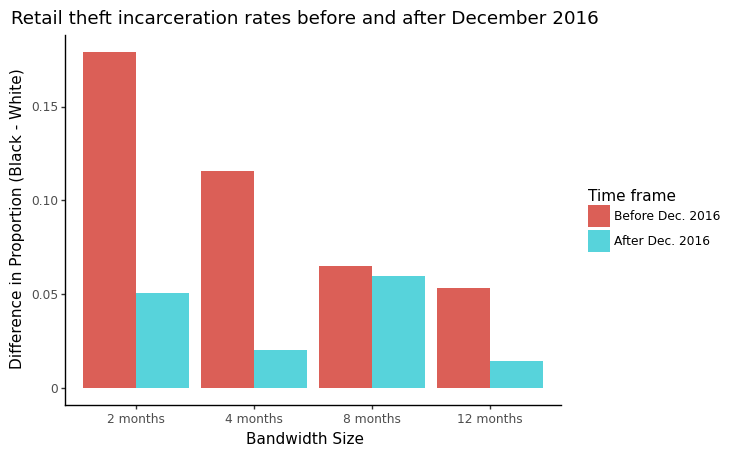

<ggplot: (8787170878835)>

In [35]:
# 2.3.3
retail_theft = data[data["simplified_offense_derived"] == "Retail Theft"]
retail_theft = retail_theft[(retail_theft["is_white_derived"] == True) | (retail_theft["is_black_derived"] == True)]


# define function
def bandwidth(search_for, search_in, date_min, date_max):
    
    # subset to crimes in the time frame 
    time_frame = search_in[(search_in[search_for] > date_min) & (search_in[search_for] < date_max)].copy()
    
    # subset into pre dec 2016 and post dec 2016 to make comparisons 
    time_frame["pre"] = np.where(time_frame[search_for] < "2016-12-01", True, False).copy()
    time_frame["race"] = np.where(time_frame["is_black_derived"] == True, True, False).copy()
    
    # rj note- added this print statement bc 
    # time_frame filter is filtering out the first month in the bandwidth accidentally
    # so for first iteration see that only includes november and january, 
    # rather than october and feb as well
    # also inaverdantly still includes december 
    print("Months this round are: " + "; ".join(time_frame[search_for].astype(str).unique()))

    #denominator
    denom_total = time_frame.groupby(by = ["pre", "race"])["CASE_ID"].count()
    denom_total = denom_total.reset_index()
    denom_total = denom_total.set_axis(["pre", "race", "denominator"], axis=1, inplace=False)

    #numerator 
    numerator = time_frame[(time_frame["COMMITMENT_TYPE"] == "Illinois Department of Corrections")]
    numerator = numerator.groupby(by = ["pre", "race"])["CASE_ID"].count()
    numerator = numerator.reset_index()
    numerator = numerator.set_axis(["pre", "race", "numerator"], axis=1, inplace=False)
    
    # merge
    denom_total = pd.DataFrame(denom_total)
    numerator = pd.DataFrame(numerator)
    
    final = pd.merge(denom_total, numerator, on = ['race', 'pre'])
    final["prop"] = final["numerator"] / final["denominator"]
    final = final.loc[:, ('pre', 'race', 'prop')]
    final = final.pivot_table(index = 'pre', columns = 'race', values = 'prop')
    final['date'] = date_min
    final = final.set_axis(["White Incarceration Rate", "Black Incarceration Rate", "Start Date"], axis=1, inplace=False)
    return(final)


# two month bandwidth (oct 2016 to feb 2017)
twomonth = bandwidth("sentenceym_derived", retail_theft, "2016-10-01", "2017-02-01")

# four month bandwidth (august 2016 to april 2017)
fourmonth = bandwidth("sentenceym_derived", retail_theft, "2016-08-01", "2017-04-01")

# eight month bandwidth (april 2016 - aug 2017)
eightmonth = bandwidth("sentenceym_derived", retail_theft, "2016-04-01", "2017-08-01")

# twelve month bandwidth (dec 2015 - dec 2017)
twelvemonth = bandwidth("sentenceym_derived", retail_theft, "2015-12-01", "2017-12-01")

# make final dataframe by concatonating the 4 bandwidth dfs
graphdf = pd.concat([twomonth, fourmonth, eightmonth, twelvemonth])
graphdf["difference"] = graphdf["Black Incarceration Rate"] - graphdf["White Incarceration Rate"]
graphdf = graphdf.reset_index()
graphdf['pre'] = pd.Categorical([True, False, True, False, True, False, True, False], ordered = True)
print(graphdf)
graphdf.info()

# figure
plot3 = (p9.ggplot(data=graphdf, mapping=p9.aes(x='Start Date', y = "difference", fill="pre")) +
        p9.geom_bar(position = "dodge", stat= "identity") +
         p9.labs(x = "Bandwidth Size", 
                y = "Difference in Proportion (Black - White)",
                title = "Retail theft incarceration rates before and after December 2016", 
                fill = "Time frame") +
         p9.theme_classic() +
         p9.scales.scale_x_discrete(labels = ["2 months", "4 months", "8 months", "12 months"])
        
        )
       
         
plot3 + p9.scale_fill_discrete(labels=["Before Dec. 2016", "After Dec. 2016"])

### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

The two month bandwidth bars look initially very promising, the difference in incarceration rates drops signficantly in the 2 months following the new law, from a difference of about 0.2 to 0.05. However, when you look at the bigger bandwidths (8 months, 12 months), the gap in the months leading up to the change was intially smaller (around 0.05 point disparity) and relative to the post-December 2016 number is not that much bigger, espeically for the 8 month bandwidth. In general, the policy change seems to have narrrowed disparities, even if quite marginally. There are no bandwidths in which the difference grew after the policy change.